In [516]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [517]:
df = pd.read_csv("model training\Customer_Data.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\RAINA\AppData\Local\Temp\ipykernel_29080\3688396677.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("model training\Customer_Data.csv")


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [518]:
print(df.columns)

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')


In [519]:
dropped_columns = ['Customer_ID', 'Churn_Category', 'Churn_Reason', 'Unlimited_Data']
df = df.drop(dropped_columns, axis=1)

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6418 non-null   object 
 1   Age                          6418 non-null   int64  
 2   Married                      6418 non-null   object 
 3   State                        6418 non-null   object 
 4   Number_of_Referrals          6418 non-null   int64  
 5   Tenure_in_Months             6418 non-null   int64  
 6   Value_Deal                   2870 non-null   object 
 7   Phone_Service                6418 non-null   object 
 8   Multiple_Lines               5796 non-null   object 
 9   Internet_Service             6418 non-null   object 
 10  Internet_Type                5028 non-null   object 
 11  Online_Security              5028 non-null   object 
 12  Online_Backup                5028 non-null   object 
 13  Device_Protection_

In [521]:
df.shape

(6418, 28)

In [522]:
encoded_columns = ['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Contract', 'Paperless_Billing', 'Payment_Method']
label_encoders = {}

In [523]:
for column in encoded_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [524]:
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,35,0,4,7,27,5,1,0,1,...,1,1,1,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0,45,1,12,14,13,5,1,1,1,...,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,1,51,0,21,4,35,4,1,0,1,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,Churned
3,1,79,0,9,3,21,3,1,0,1,...,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0,80,0,17,3,8,5,1,0,1,...,0,1,1,83.9,267.40,0.00,0,22.14,289.54,Churned


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6418 non-null   int64  
 1   Age                          6418 non-null   int64  
 2   Married                      6418 non-null   int64  
 3   State                        6418 non-null   int64  
 4   Number_of_Referrals          6418 non-null   int64  
 5   Tenure_in_Months             6418 non-null   int64  
 6   Value_Deal                   6418 non-null   int64  
 7   Phone_Service                6418 non-null   int64  
 8   Multiple_Lines               6418 non-null   int64  
 9   Internet_Service             6418 non-null   int64  
 10  Internet_Type                6418 non-null   int64  
 11  Online_Security              6418 non-null   int64  
 12  Online_Backup                6418 non-null   int64  
 13  Device_Protection_

In [526]:
df['Customer_Status'].value_counts()

Customer_Status
Stayed     4275
Churned    1732
Joined      411
Name: count, dtype: int64

In [527]:
df['Customer_Status'].dropna(inplace=True)

In [528]:
df['Customer_Status'].isna().sum()

np.int64(0)

In [529]:
df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

In [530]:
# Drop NaN values in X
X_cleaned = X.dropna()

# Drop NaN values in y
y_cleaned = y.dropna()

# Make sure both have the same length (they may differ after dropping NaNs)
min_len = min(len(X_cleaned), len(y_cleaned))

# Slice both to the same length
X_cleaned = X_cleaned.iloc[:min_len]
y_cleaned = y_cleaned.iloc[:min_len]

# Verify lengths match
print(len(X_cleaned), len(y_cleaned))


6007 6007


In [531]:
X.shape

(6418, 27)

In [532]:
print(y.isna().sum())

411


In [533]:
X_cleaned = X[~y.isna()]
y_cleaned = y.dropna()

# Reset index to avoid issues
X_cleaned = X_cleaned.reset_index(drop=True)
y_cleaned = y_cleaned.reset_index(drop=True)

# Confirm they have the same length
print(len(X_cleaned), len(y_cleaned))  # These must be equal

6007 6007


In [534]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

print("After SMOTE:", len(X_resampled), len(y_resampled))  # These should be equal


After SMOTE: 8550 8550


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6418 non-null   int64  
 1   Age                          6418 non-null   int64  
 2   Married                      6418 non-null   int64  
 3   State                        6418 non-null   int64  
 4   Number_of_Referrals          6418 non-null   int64  
 5   Tenure_in_Months             6418 non-null   int64  
 6   Value_Deal                   6418 non-null   int64  
 7   Phone_Service                6418 non-null   int64  
 8   Multiple_Lines               6418 non-null   int64  
 9   Internet_Service             6418 non-null   int64  
 10  Internet_Type                6418 non-null   int64  
 11  Online_Security              6418 non-null   int64  
 12  Online_Backup                6418 non-null   int64  
 13  Device_Protection_

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [537]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [538]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [539]:
scaler = StandardScaler();

In [540]:
rf_pipeline = Pipeline([
    ('scaler', scaler),
    ('rf_model', rf_model)
])

In [541]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [542]:
y_pred = rf_model.predict(X_test)

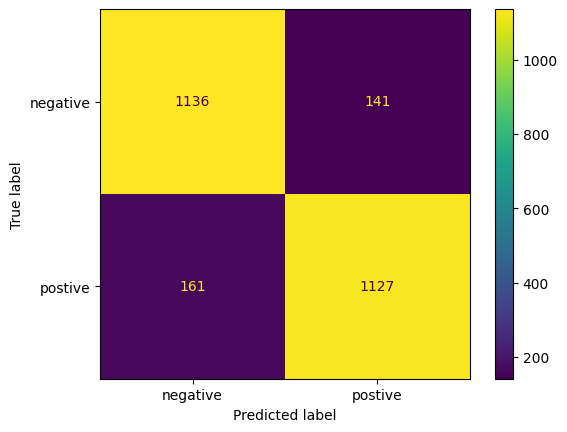

In [543]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['negative', 'postive'])
cm_display.plot()
plt.show()

In [544]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1277
         1.0       0.89      0.88      0.88      1288

    accuracy                           0.88      2565
   macro avg       0.88      0.88      0.88      2565
weighted avg       0.88      0.88      0.88      2565



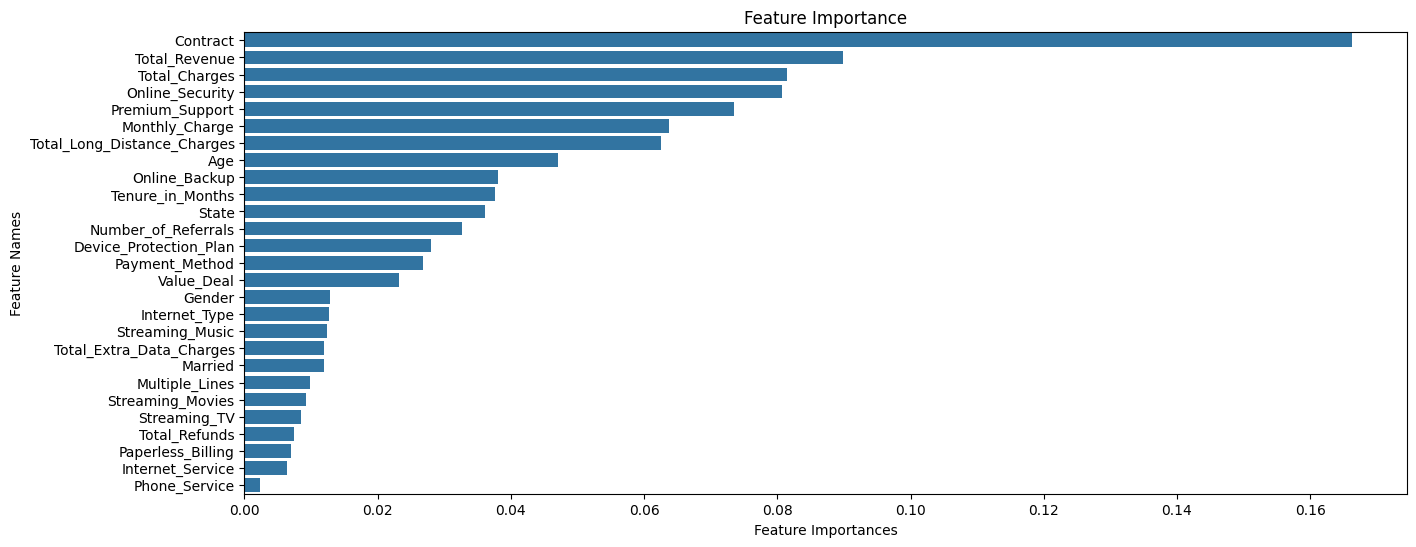

In [545]:
import seaborn as sns
importanced =  rf_model.feature_importances_
indices = np.argsort(importanced)[::-1]

plt.figure(figsize=(15,6))
sns.barplot(x=importanced[indices], y=X.columns[indices])
plt.title("Feature Importance")
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.show()



In [ ]:
rf_pipeline.predict([[]])